In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read data

In [2]:
credit_df = pd.read_csv("train.csv")

In [3]:
credit_df.sample(10)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
468,469,b,33.5,1.750,u,g,x,h,4.500,t,t,4,t,g,253,857,+
138,139,b,28.75,1.165,u,g,k,v,0.500,t,f,0,f,s,280,0,-
295,296,b,23.75,0.415,y,p,c,v,0.040,f,t,2,f,g,128,6,-
418,419,a,20.67,3.000,u,g,q,v,0.165,t,t,3,f,g,100,6,+
53,54,a,22.75,6.165,u,g,aa,v,0.165,f,f,0,f,g,220,1000,-
459,460,a,18.83,9.540,u,g,aa,v,0.085,t,f,0,f,g,100,0,+
11,12,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,300,0,-
396,397,b,27.67,2.000,u,g,x,h,1.000,t,t,4,f,g,140,7544,+
289,290,b,20.67,0.415,u,g,c,v,0.125,f,f,0,f,g,0,44,-
449,450,b,23.08,11.500,u,g,i,v,3.500,t,t,9,f,g,56,742,+


### Explore and Clean data

In [4]:
credit_df = credit_df.drop("Key", axis=1)
credit_df = credit_df.drop("ZipCode", axis=1)

In [5]:
credit_df.shape

(590, 15)

In [6]:
credit_df.dtypes

Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
Income              int64
Approved           object
dtype: object

In [7]:
credit_df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000
mean,4.609390,2.088534,2.045763,918.706780
std,4.849569,3.198681,3.702375,5025.415369
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.710000,1.000000,0.000000,4.000000
75%,7.000000,2.500000,2.000000,363.000000
max,26.335000,20.000000,20.000000,100000.000000


#### Identifying classes of each categorical variable

In [8]:
for key in credit_df.columns:
    if credit_df[key].dtype == "object":
        print(credit_df[key].value_counts())
        

b    400
a    179
?     11
Name: Male, dtype: int64
?        12
22.67     8
20.42     6
20.67     6
22.5      6
18.83     6
23.58     6
19.17     5
24.5      5
27.67     5
23.08     5
25        5
24.58     4
28.58     4
23        4
26.17     4
33.17     4
20        4
25.17     4
24.75     4
32.33     4
23.5      4
22.08     3
21.5      3
26.67     3
18.17     3
28.17     3
22.75     3
20.5      3
41.17     3
         ..
43.08     1
22.33     1
41.42     1
34.92     1
41        1
50.08     1
31.33     1
34.25     1
19.75     1
30.5      1
62.5      1
32.08     1
32.92     1
47.83     1
58.42     1
17.33     1
17.5      1
42        1
28.33     1
59.67     1
73.42     1
76.75     1
35.42     1
31.58     1
41.75     1
21.58     1
18.5      1
57.58     1
36.25     1
15.83     1
Name: Age, Length: 322, dtype: int64
u    434
y    148
?      6
l      2
Name: Married, dtype: int64
g     434
p     148
?       6
gg      2
Name: BankCustomer, dtype: int64
c     119
q      65
i      53
w      51
aa

#### Identifying missing values

In [9]:
credit_df = credit_df.replace('?', np.nan)

In [10]:
credit_df.isnull().sum() 

Male              11
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
Income             0
Approved           0
dtype: int64

#### Filling missing values 

In [11]:
credit_df = credit_df.fillna(method='ffill')

In [12]:
credit_df["Male"] = credit_df["Male"].fillna("b")

In [13]:
credit_df["Age"] = pd.to_numeric(credit_df["Age"])

#### Label encoding categorical variables

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

In [15]:
for key in credit_df.columns:
    if credit_df[key].dtype == "object":
        credit_df[key]= label_encoder.fit_transform(credit_df[key]) 
        credit_df[key].unique() 
        print(credit_df[key].value_counts())

1    409
0    181
Name: Male, dtype: int64
1    439
2    149
0      2
Name: Married, dtype: int64
0    439
2    149
1      2
Name: BankCustomer, dtype: int64
1     121
10     68
12     54
6      54
0      50
5      49
8      45
13     33
9      30
2      29
3      24
4      21
7      10
11      2
Name: EducationLevel, dtype: int64
7    345
3    106
0     56
2     53
4      9
8      8
1      6
5      5
6      2
Name: Ethnicity, dtype: int64
0    299
1    291
Name: PriorDefault, dtype: int64
0    350
1    240
Name: Employed, dtype: int64
0    327
1    263
Name: DriversLicense, dtype: int64
0    530
2     52
1      8
Name: Citizen, dtype: int64
1    358
0    232
Name: Approved, dtype: int64


In [16]:
credit_df.sample(5)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
249,1,20.42,1.085,1,0,10,7,1.500,0,0,0,0,0,7,1
571,1,73.42,17.750,1,0,5,2,0.000,1,0,0,1,0,0,0
108,0,28.58,3.750,1,0,1,7,0.250,0,1,1,1,0,154,1
158,1,16.25,0.835,1,0,9,7,0.085,1,0,0,0,2,0,1
133,1,35.25,16.500,2,2,1,7,4.000,1,0,0,0,0,0,1


#### Examining correlation

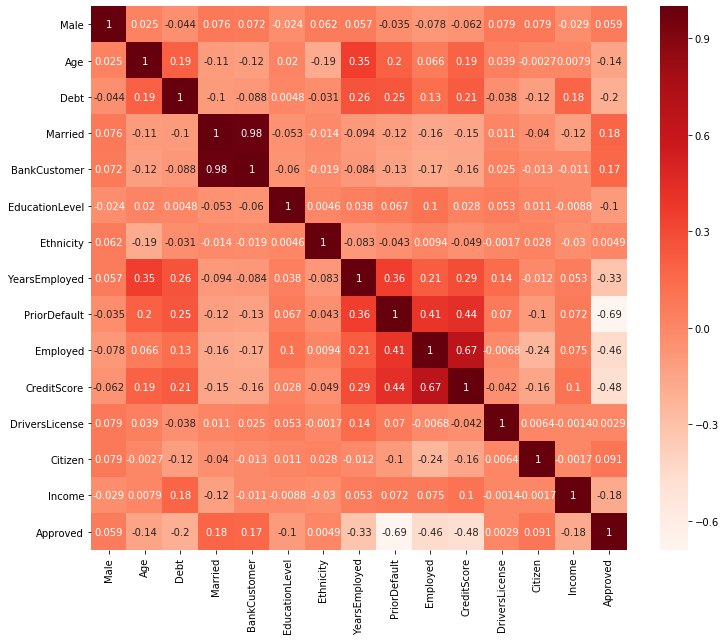

In [17]:
plt.figure(figsize=(12,10))
corr = credit_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
X = credit_df.drop("Approved", axis=1)
Y = credit_df["Approved"]

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(531, 14)
(59, 14)
(531,)
(59,)


#### Convert data into tensors

In [21]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [22]:
Xtrain_ = torch.from_numpy(x_train.values).float()
Xtest_ = torch.from_numpy(x_test.values).float()

In [23]:
Xtrain_.shape

torch.Size([531, 14])

Y parameters have shape 531 X 1 but we need those in shape 1 X 531<br>
Our loss function doesnt support multi-target, our target should be 1D Tensor
i.e 1 row containing all the labels<br>

In [24]:
Ytrain_ = torch.from_numpy(y_train.values).view(1,-1)[0]
Ytest_ = torch.from_numpy(y_test.values).view(1,-1)[0]

In [25]:
Ytrain_.shape

torch.Size([531])

## Creating a classifier


we have 14 features therefore input size is 14 and we want 2 discrete outputs 

In [26]:
input_size = 14
output_size = 2
hidden_size = 200

#### Define a neural network class from which to create our model

We create a class named Net which inherits nn.Module(Base class for all neural network modules.)<br>

<b>super :</b> This is calling the \__init__() method of the parent class(nn.Module)

<b>fc1 to fc3 :</b>  Applies a linear transformation to the incoming data: y=Wx+b<br>
Parameters :<br>
in_features – size of each input sample<br>
out_features – size of each output sample<br>
bias – If set to False, the layer will not learn an additive bias. Default: True<br>

<b>Sigmoid : </b>Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))

<b>log_softmax :</b>
Softmax applies the Softmax() function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0,1) and sum to 1<br>
While mathematically equivalent to log(softmax(x)), doing these two operations separately is slower, and numerically unstable. This function uses an alternative formulation to compute the output and gradient correctly.<br>
Parameters:<br>
dim(int) – A dimension along which Softmax will be computed (so every slice along dim will sum to 1).


In [27]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, X):
        X = torch.sigmoid((self.fc1(X)))
        X = torch.sigmoid(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=-1)

In [28]:
model = Net()

#### Defining optimizer and loss function

In [29]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr = 0.0001)

loss_fn = nn.CrossEntropyLoss()

#### Training the model

Optimizer.zero_grad:
* Before the backward pass, use the optimizer object to zero all of the gradients for the variables it will update (which are the learnable weights of the model)

Foward Pass:
* Predicting Y with input data X

Finding training Loss:
* Finding difference between Y_train_tensor and Y_pred using NLLLoss() function defined above


Back Propogation:
* back propogation is done by simply loss.backward() function


In [30]:
epochs = 3500

for epoch in range(epochs):

    optimizer.zero_grad()
    Ypred = model(Xtrain_)

    loss = loss_fn(Ypred , Ytrain_)
    loss.backward()

    optimizer.step()
        
    if epoch % 100 == 0:
        print ('Epoch', epoch, 'loss', loss.item())

Epoch 0 loss 0.7017576098442078
Epoch 100 loss 0.6150962710380554
Epoch 200 loss 0.5854577422142029
Epoch 300 loss 0.5373319387435913
Epoch 400 loss 0.49198633432388306
Epoch 500 loss 0.45522961020469666
Epoch 600 loss 0.42511364817619324
Epoch 700 loss 0.39892876148223877
Epoch 800 loss 0.37177708745002747
Epoch 900 loss 0.3441428542137146
Epoch 1000 loss 0.31594356894493103
Epoch 1100 loss 0.2884044945240021
Epoch 1200 loss 0.2633894383907318
Epoch 1300 loss 0.23971422016620636
Epoch 1400 loss 0.2173154503107071
Epoch 1500 loss 0.1958729326725006
Epoch 1600 loss 0.17526063323020935
Epoch 1700 loss 0.15549084544181824
Epoch 1800 loss 0.13835634291172028
Epoch 1900 loss 0.12259595096111298
Epoch 2000 loss 0.10775220394134521
Epoch 2100 loss 0.09382297843694687
Epoch 2200 loss 0.08102191239595413
Epoch 2300 loss 0.0690966323018074
Epoch 2400 loss 0.0588105246424675
Epoch 2500 loss 0.049839168787002563
Epoch 2600 loss 0.04212988540530205
Epoch 2700 loss 0.03558691218495369
Epoch 2800 los

In [31]:
model.eval()

Net(
  (fc1): Linear(in_features=14, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=2, bias=True)
)

In [32]:
predict_out = model(Xtest_)
_, predict_y = torch.max(predict_out, 1)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print ('prediction accuracy', accuracy_score(Ytest_.data, predict_y.data))
print ('precision', precision_score(Ytest_.data, predict_y.data))
print ('recall', recall_score(Ytest_.data, predict_y.data))
print ('f1_score',f1_score(Ytest_.data, predict_y.data))


prediction accuracy 0.8983050847457628
precision 0.8837209302325582
recall 0.9743589743589743
f1_score 0.9268292682926831


#### Test the model on new data

In [34]:
df = pd.read_csv("test.csv")

In [35]:
df.sample(5)

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
34,35,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442
69,70,b,56.42,28.000,y,p,c,v,28.500,t,t,40,f,g,0,15
99,100,b,25.67,12.500,u,g,cc,v,1.210,t,t,67,t,g,140,258
3,4,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,252,0
45,46,b,25.00,11.250,u,g,c,v,2.500,t,t,17,f,g,200,1208


In [36]:
test_df = df.drop("Key", axis=1)
test_df = test_df.drop("ZipCode", axis=1)

In [37]:
test_df = test_df.replace('?', np.nan)

test_df.isnull().sum() 

test_df = test_df.fillna(method='ffill')

In [38]:
for key in test_df.columns:
    if test_df[key].dtype == "object":
        test_df[key]= label_encoder.fit_transform(test_df[key]) 
        test_df[key].unique() 

In [39]:
test_ = torch.from_numpy(test_df.values).float()

In [40]:
predict_out = model(test_)
_, predict_y = torch.max(predict_out, 1)

### 0 means approved and 1 means denied.

In [41]:
y = predict_y.numpy()

In [42]:
d = {'Key': df['Key'], 'Approved': y}
result = pd.DataFrame(data=d)

In [43]:
result.to_csv("submission", index=False)